In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# <h1 style="color:yellow; font-weight:1000">Instead of writing the doing the analysis one by one i could have just loop through it</h1>

# <h1 style="color:yellow; font-weight:1000">Learn how to format your notebook to be Industry standard</h1>

# <h1 style="color:yellow; font-weight:1000">Chatgpt can help you turn the features to graph titles</h1>

# Obesity Analysis

In [52]:
# import and read the csv file
file_path = "ObesityDataSet_raw_and_data_sinthetic.csv"
df = pd.read_csv(file_path)


**Obesity Analysis**

This notebook explores a dataset concerning obesity levels in individuals. Our main goal is to identify factors that influence obesity and develop a model that predicts obesity based on the provided data.

**Dataset Description**

The dataset contains information about individuals and their potential links to obesity. Here's a breakdown of the features:

* **Gender:** Categorical variable indicating the person's gender.
* **Age:** Continuous variable representing the individual's age in years.
* **Height:** Continuous variable representing the person's height.
* **Weight:** Continuous variable representing the person's weight.
* **family_history_with_overweight:** Binary variable indicating whether a family member has or had overweight. (1 = Yes, 0 = No)
* **FAVC:** Binary variable indicating whether the person frequently consumes high-calorie foods. (1 = Yes, 0 = No)
* **FCVC:** Integer variable representing the usual frequency of vegetable consumption in meals (Higher values indicate more frequent intake).
* **NCP:** Continuous variable representing the average number of main meals consumed daily.
* **CAEC:** Categorical variable indicating snacking habits (e.g., never, occasionally, frequently).
* **SMOKE:** Binary variable indicating whether the person smokes. (1 = Yes, 0 = No)
* **CH2O:** Continuous variable representing the daily water intake in unspecified units.
* **SCC:** Binary variable indicating whether the person monitors daily calorie intake. (1 = Yes, 0 = No)
* **FAF:** Continuous variable representing the frequency of physical activity (Higher values indicate more frequent activity).
* **TUE:** Integer variable representing the daily screen time on technological devices (e.g., phones, computers, TVs).
* **CALC:** Categorical variable indicating the frequency of alcohol consumption (e.g., never, occasionally, frequently).
* **MTRANS:** Categorical variable indicating the usual mode of transportation (e.g., walking, car, public transport).
* **NObeyesdad:** Categorical target variable representing the individual's obesity level.

**Analysis and Modeling**

We will proceed with analyzing the data to understand the relationships between these features and obesity. This analysis will help us build a model that can predict obesity levels based on the provided characteristics.

# EDA

In [53]:
df


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [54]:
# Check all the column in our data 
df.columns.values

array(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF',
       'TUE', 'CAEC', 'MTRANS', 'NObeyesdad'], dtype=object)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [56]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## Data Cleaning

In [57]:
df.duplicated().sum()

24

****There are 24 duplicated values in our data set****

In [58]:
df.drop_duplicates()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [59]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

splitting data into categorical and numerical features

In [61]:
numerical = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical = ["Gender","CALC","FAVC","SCC","SMOKE","family_history_with_overweight","CAEC","MTRANS"]

# Categorical

In [62]:
c_title  = ["Obesity Levels by Gender ","Relationship Between Alcohol Consumption and Obesity","Frequent Consumtion of Calorie Food","Frequent Consumtion of Calorie Food","Monitor's Calories Eaten Daily","Smoker's","Family History of Overweight","Snacking in between Meals","Means of Transportation"]
categorical

['Gender',
 'CALC',
 'FAVC',
 'SCC',
 'SMOKE',
 'family_history_with_overweight',
 'CAEC',
 'MTRANS']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Obesity Levels')

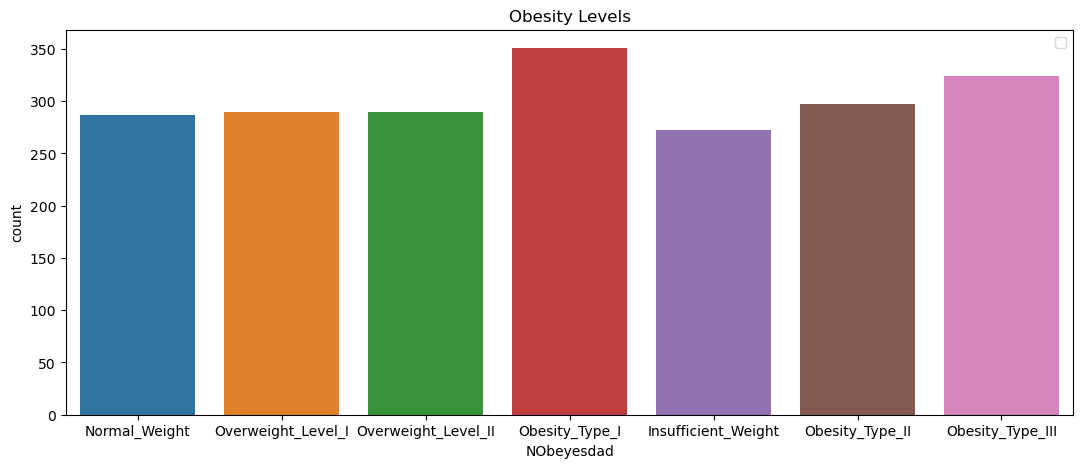

In [63]:
plt.figure(figsize=(13,5))
sns.countplot(data= df,x="NObeyesdad")
plt.legend(loc="best")
plt.title("Obesity Levels")

***According to the data men tend to have less obesity_type_III and women tend to have less obesity_type_II***

***Women tend to be more obes than men***

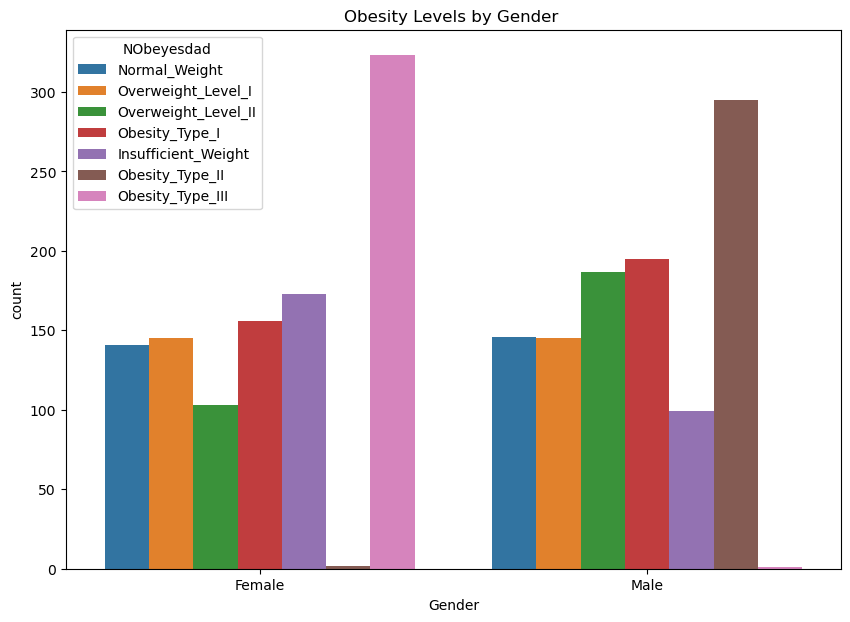

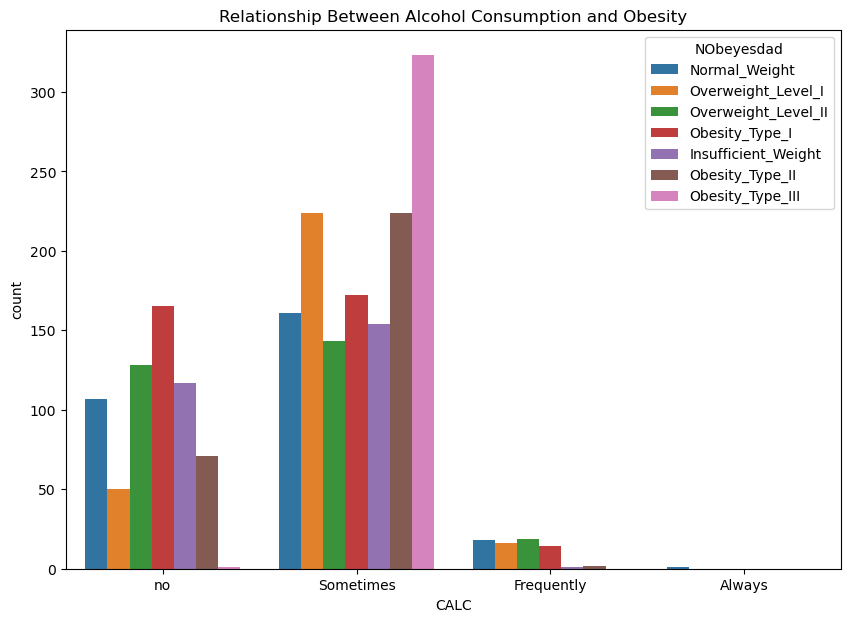

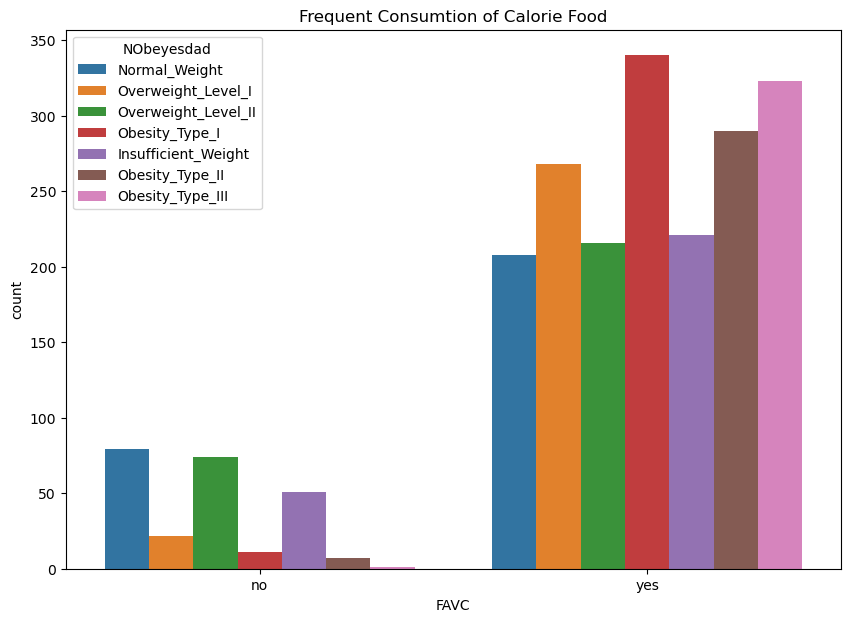

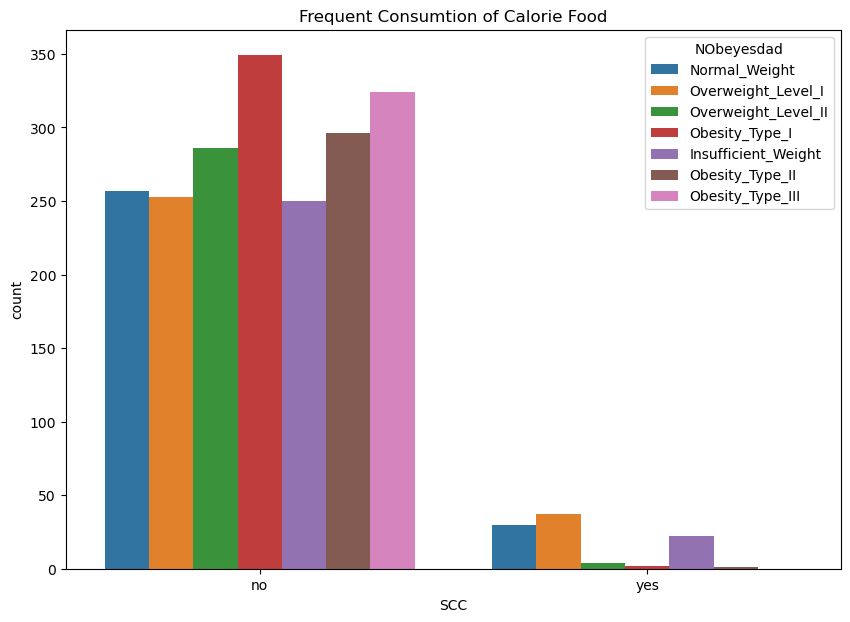

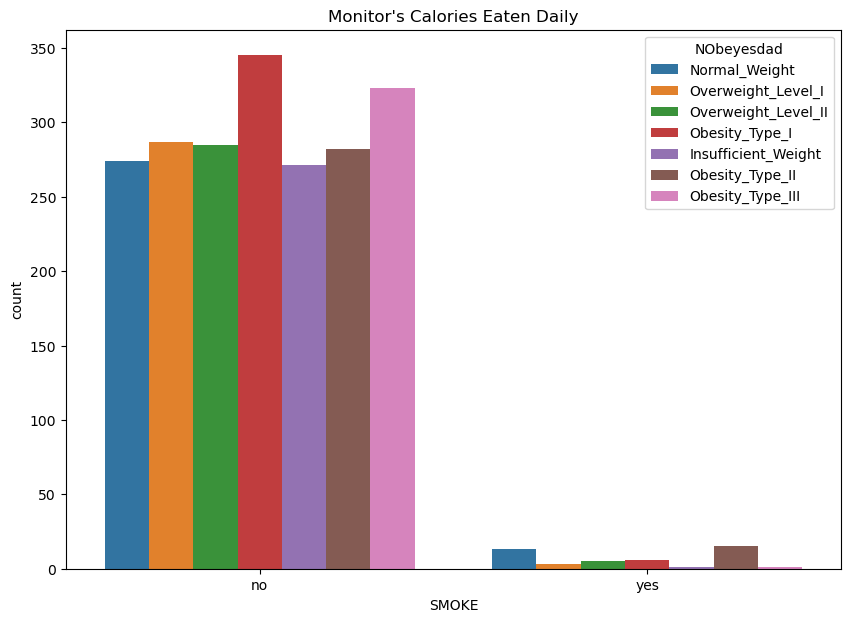

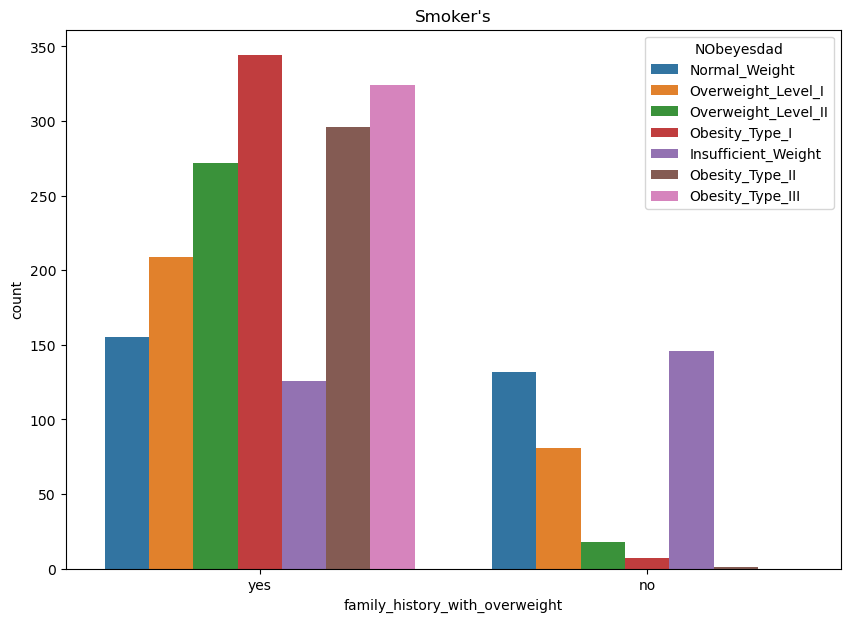

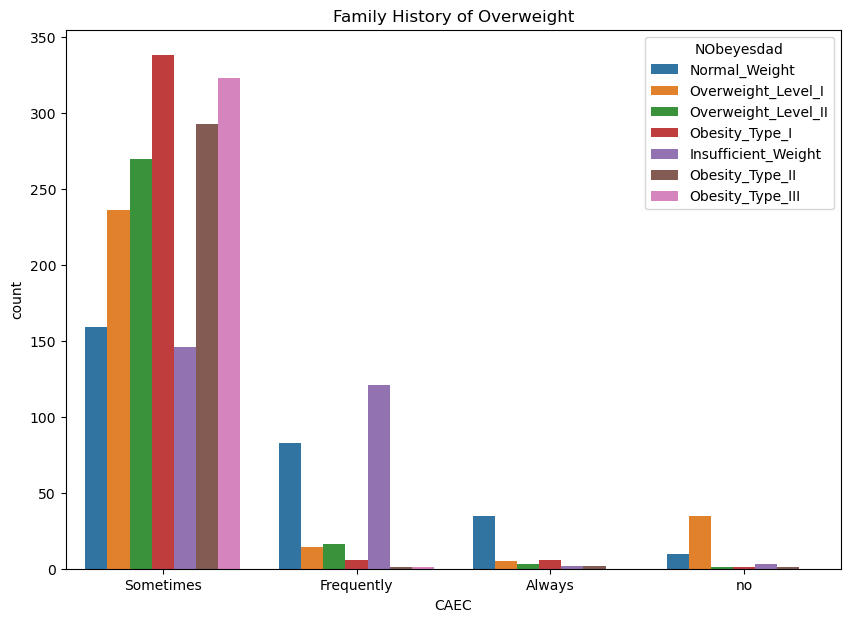

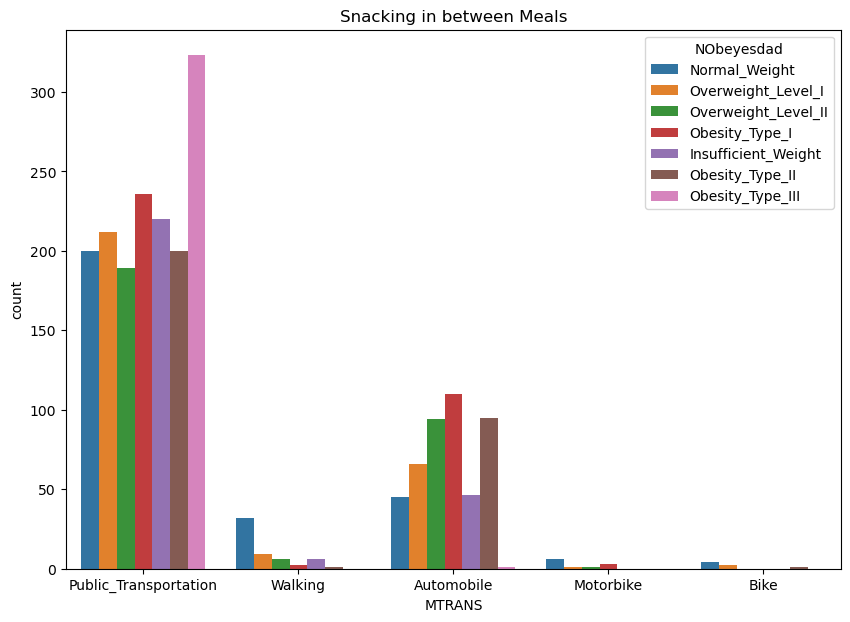

In [68]:
# for i in categorical:
#     plt.figure(figsize=(10, 7))
#     sns.countplot(data=df, x=i, hue="NObeyesdad")  # Use 'i' as the x-axis variable
#     plt.title(c_title.index[i])  # Set 
    
for i in categorical:
    plt.figure(figsize=(10, 7))
    sns.countplot(data=df, x=i, hue="NObeyesdad")

    # Find the corresponding title in c_title (assuming an index match)
    try:
        title_index = categorical.index(i)  # Get the index of 'i' in categorical
        plot_title = c_title[title_index]  # Use the index to retrieve the title from c_title
    except ValueError:  # Handle potential errors if 'i' not found in categorical
        plot_title = "Title Not Found"

    plt.title(plot_title)



***Obesity_level_I frequently consumes food***

# Numerical

In [ ]:
numerical
df.dtypes

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

c:\Users\personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

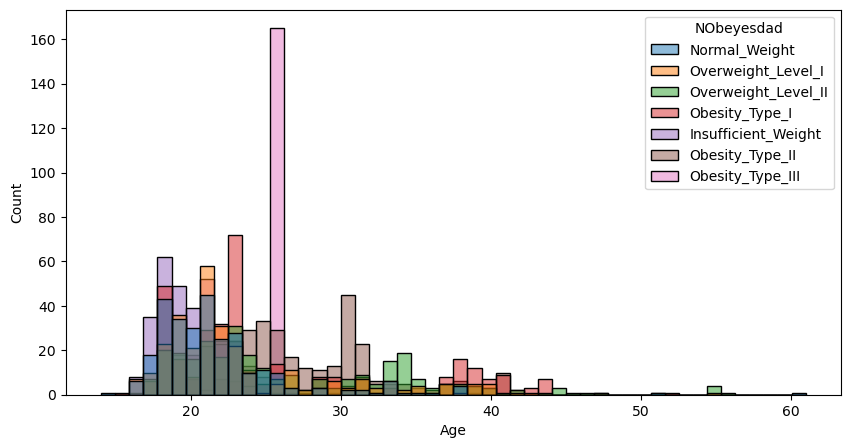

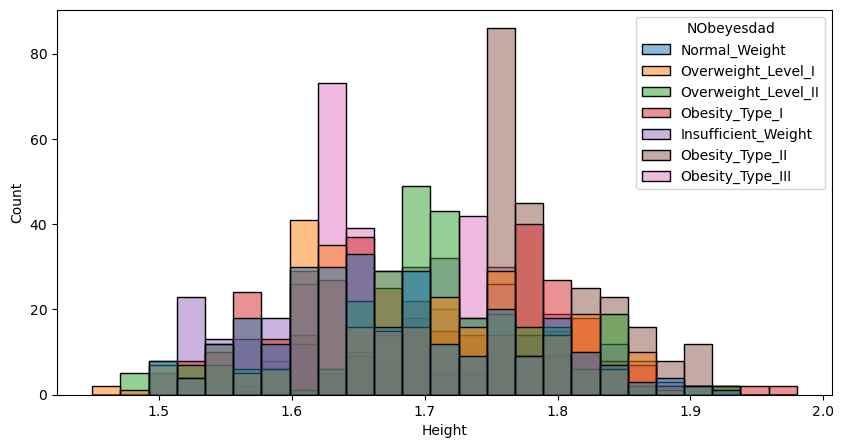

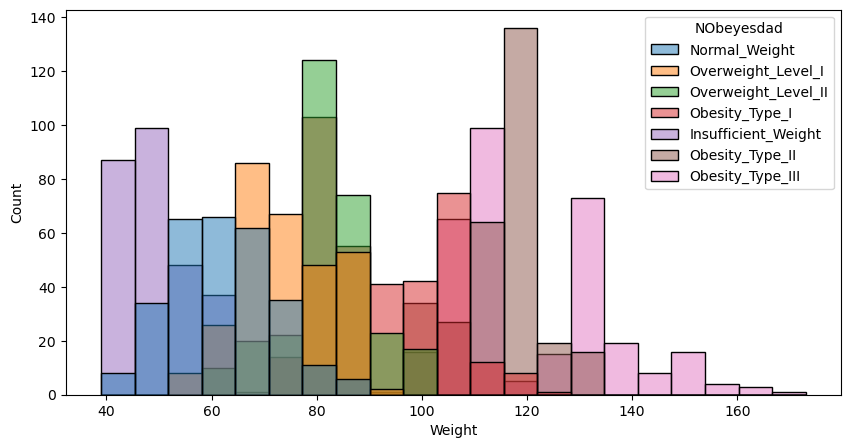

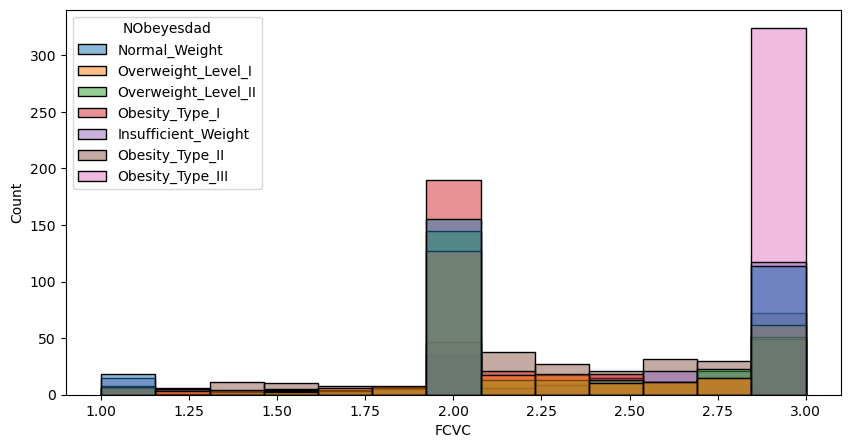

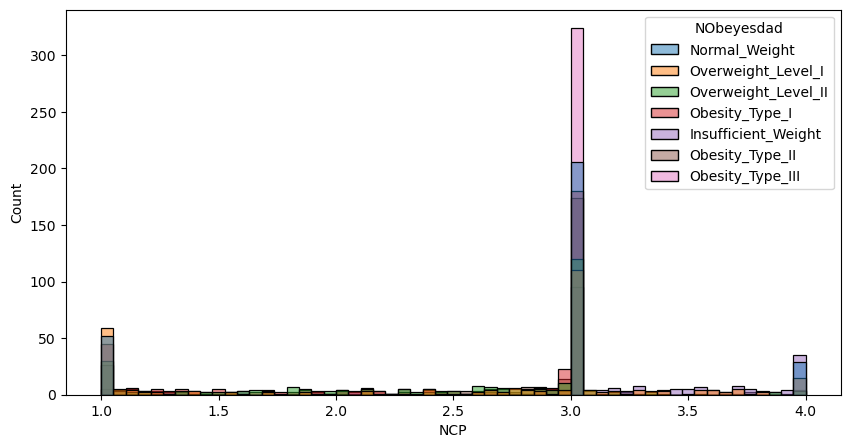

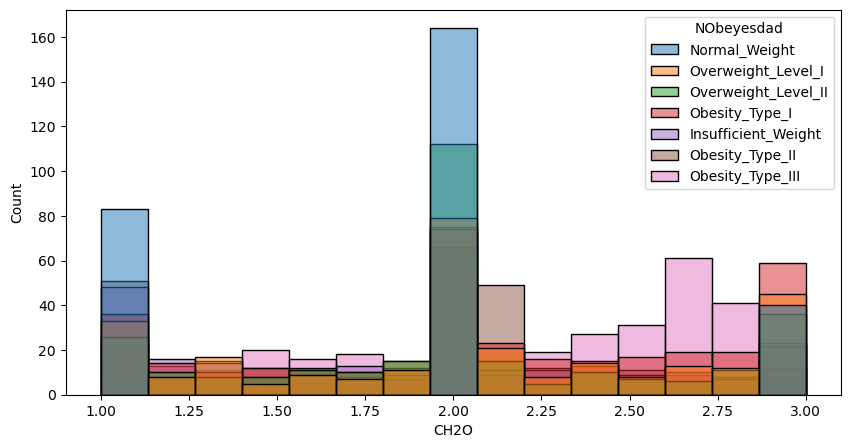

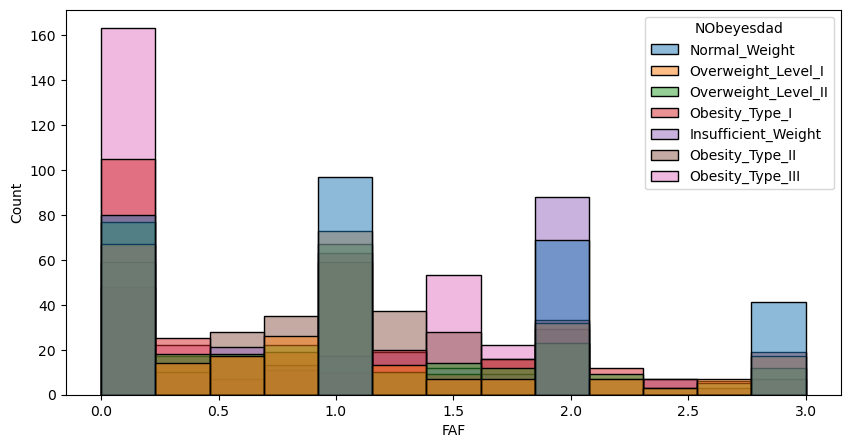

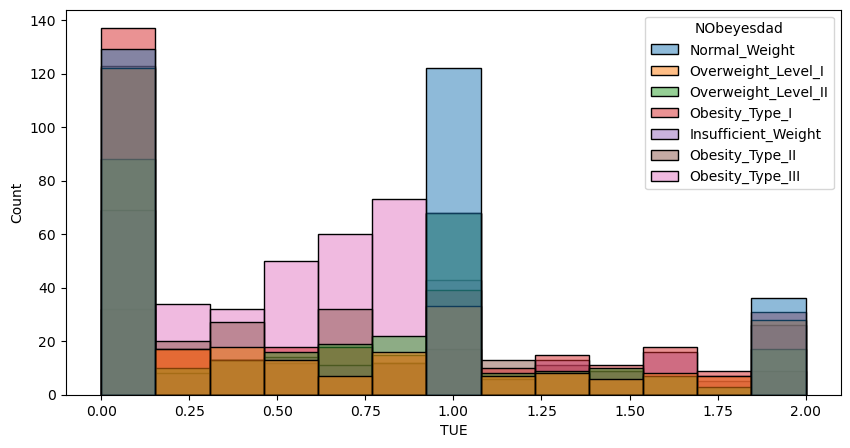

In [ ]:
for i in numerical:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df, x=i,hue="NObeyesdad")

<h1 style="color:lime">Heat map no dey work<h1>

# HEAT MAP

<Axes: >

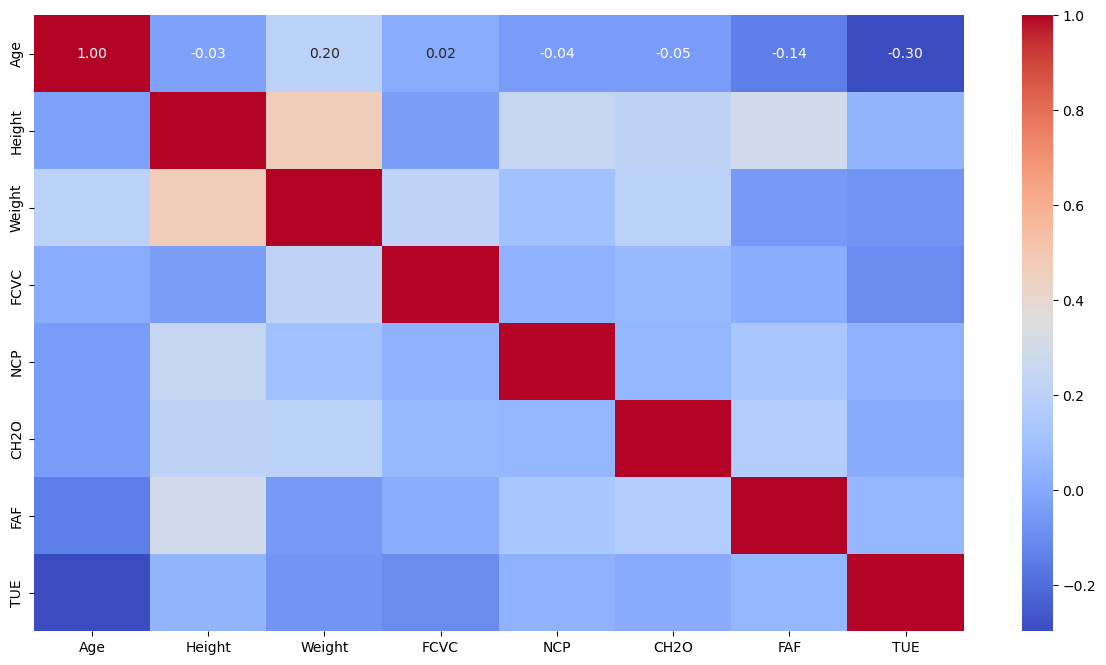

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df[numerical].corr(), annot=True,fmt=".2f",cmap="coolwarm")

<ol style="color:lime; font-size:3rem;font-weight:1000">
<li>Feature Encoding</li>
<li>Feature Scaling</li>
<li>Model building</li>
</ol>